In [114]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('./Data/winequality-red.csv')

#creating training and validation split

In [115]:

df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


#Scale 0 to 1

In [116]:

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

#Split features and target

In [117]:
X_train = df_train.drop('quality', axis=1)
X_valid = df_train.drop('quality', axis=1)
Y_train = df_train['quality']
Y_valid = df_train['quality']

#Get  raw count

In [118]:
# For DataFrames
num_rows_X_train = X_train.shape[0]
num_rows_X_valid = X_valid.shape[0]

# For Series
num_rows_Y_train = Y_train.shape[0]
num_rows_Y_valid = Y_valid.shape[0]

print(f"Number of rows in X_train: {num_rows_X_train}")
print(f"Number of rows in X_valid: {num_rows_X_valid}")
print(f"Number of rows in Y_train: {num_rows_Y_train}")
print(f"Number of rows in Y_valid: {num_rows_Y_valid}")


Number of rows in X_train: 1119
Number of rows in X_valid: 1119
Number of rows in Y_train: 1119
Number of rows in Y_valid: 1119


#We can find how many rows and columns we have. Columns means inputs

In [119]:
display(X_train)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692
...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692



We've selected a three-layer neural network with more than 1500 neurons, which should be able to learn relatively complex patterns in the data.

In [120]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1)
])

c:\Users\BS567\Documents\Neural Network\deep learning\deep-learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Definign the architechture model of the process

In [121]:
model.compile(
    optimizer='adam',
    loss='mae'
)

Ready to start training. We will define 256 rows of training data at 10 epoch.

In [122]:
history = model.fit(X_train, Y_train, 
                    validation_data=(X_valid, Y_valid), 
                    batch_size=256, epochs=10)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.3636 - val_loss: 0.1310
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1408 - val_loss: 0.1225
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1327 - val_loss: 0.1166
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1215 - val_loss: 0.1134
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1215 - val_loss: 0.1124
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1145 - val_loss: 0.1101
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1069 - val_loss: 0.1094
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1058 - val_loss: 0.1057
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1042 - val_loss: 0.1041
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1013 - val_loss: 0.1019


The fit method in fact keeps a record of the loss produced during training in a History object. The the loss track of the traning model

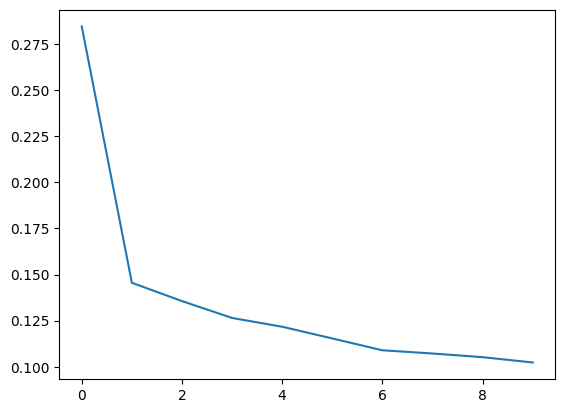

In [123]:
from matplotlib import pyplot as plt
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'])

The loss levels reduce by each epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.
